<a href="https://colab.research.google.com/github/avneeshdubey99/ML_Lab1/blob/master/Experiment_2(Ex_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

Import dataset

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
automob = pd.read_csv(filename, names=headers)

In [ ]:
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Check illegal characters

In [ ]:
import numpy as np

automob.replace("?", np.nan, inplace=True)
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Check missing data

In [ ]:
missing = automob.isnull()
missing.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Count missing value for each column

In [ ]:
automob.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [ ]:
automob.shape

(205, 26)

Drop rows with missing price column data

In [ ]:
automob.dropna(subset=['price'], axis=0, inplace=True)

In [ ]:
automob.shape

(201, 26)

Replace missing with mean for normalized losses , bore , stroke , horsepower and peak rpm column ( continouous variables )



In [ ]:
avg_normloss = automob['normalized-losses'].astype('float').mean(axis=0)
automob['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)

In [ ]:
avg_bore = automob['bore'].astype('float').mean(axis=0)
automob['bore'].replace(np.nan,avg_bore,inplace=True)

In [ ]:
avg_stroke = automob['stroke'].astype('float').mean(axis=0)
automob['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [ ]:
avg_hp = automob['horsepower'].astype('float').mean(axis=0)
automob['horsepower'].replace(np.nan,avg_hp,inplace=True)

In [ ]:
avg_rpm = automob['peak-rpm'].astype('float').mean(axis=0)
automob['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

Replace missing with mode for number of doors ( Categorical Variables )

In [ ]:
automob['num-of-doors'].value_counts()
automob['num-of-doors'].replace(np.nan,'four',inplace=True)

Check number of null values

In [ ]:
automob.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Reset index

In [ ]:
automob.reset_index(drop=True, inplace=True)
automob.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Check datatype and convert where required

In [ ]:
automob.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']]=automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']].astype('float')

In [ ]:
automob.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Convert to SI

In [ ]:
automob['city-L/100km'] = 235/automob['city-mpg']
automob['highway-L/100km'] = 235/automob['highway-mpg']

Normalization using max 

In [ ]:
automob['length'] = automob['length']/automob['length'].max()
automob['width'] = automob['width']/automob['width'].max()
automob['height'] = automob['height']/automob['height'].max()

Horsepower histogram 

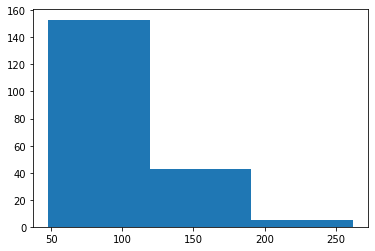

In [ ]:
plt.hist(automob['horsepower'],bins=3)
plt.show()

Binning Horsepower

In [ ]:
bins = np.linspace(min(automob["horsepower"]), max(automob["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']
automob['horsepower-binned'] = pd.cut(automob['horsepower'], bins, labels=group_names, include_lowest=True )
automob[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Low
1,111.0,Low
2,154.0,Medium
3,102.0,Low
4,115.0,Low
5,110.0,Low
6,110.0,Low
7,110.0,Low
8,140.0,Medium
9,101.0,Low


Text(0.5, 1.0, 'Horsepower Bins')

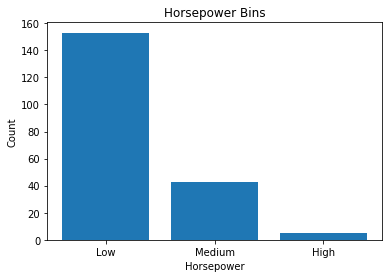

In [ ]:
plt.bar(group_names, automob["horsepower-binned"].value_counts())
plt.xlabel('Horsepower')
plt.ylabel("Count")
plt.title("Horsepower Bins")

Convert fuel-type and aspirations to one hot encoded

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [ ]:
newauto = pd.get_dummies(automob['fuel-type'])
newauto.rename(columns={'gas':'fiel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
automob = pd.concat([automob, newauto], axis=1)
automob.drop('fuel-type', inplace=True, axis=1)

In [ ]:
automob.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fiel-type-gas
0,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1
1,3,122.0,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1
2,1,122.0,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1
3,2,164.0,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1
4,2,164.0,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1


In [ ]:
asp = pd.get_dummies(automob['aspiration'])
asp.rename(columns={'std':'asp-std', 'turbo': 'asp-turbo'}, inplace=True)
automob = pd.concat([automob, asp], axis=1)
automob.drop('aspiration', inplace=True, axis=1)

In [ ]:
automob.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fiel-type-gas,asp-std,asp-turbo
0,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122.0,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122.0,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164.0,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164.0,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


Copy cleaned data to CSV

In [ ]:
automob.to_csv('cleaned.csv')

#Part 2

In [ ]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'


In [ ]:
automod1 = pd.read_csv(path)

In [ ]:
automod1.head()

In [ ]:
automod1.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#find correlation
# positive - x inc, y inc
# neutral -
#negative - x inc, y dec

automod1.corr()


In [ ]:
sns.regplot(x="highway-mpg", y="price", data=automod1)

In [ ]:
sns.boxplot(x="aspiration", y="price", data=automod1)

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=automod1)

In [ ]:
# summarizing the dataset - numeric variables only
automod1.describe()

In [ ]:
automod1.describe(include=['object'])

#Grouping the variables

In [ ]:
automod1['drive-wheels'].unique()

In [ ]:
new1 = automod1[['drive-wheels','price']]

# groupby - calculate mean price of each category of drive wheels

new1 = new1.groupby(['drive-wheels'], as_index=False).mean()

#results

new1

In [ ]:
# how are important are groups
# how to understand correlation


from scipy import stats

pearson_coeff, p_value = stats.pearsonr(automod1['wheel-base'], automod1['price'])

#find evidence of highway-mpg vs price... city-mpg vs price

In [ ]:
#p < 0.001 - strong evidence that corr is significant
#p < 0.05 - moderate evidence that corr is significant
# p < 0.1 - weak evidence that corr is significant
#p > 0.1 - no evidence that corr is significant

print(pearson_coeff)
print(p_value)

In [ ]:
#significance of groups

new1 = automod1[['drive-wheels', 'body-style','price']]

# groupby - calculate mean price of each category of drive wheels


new2 = new1[['drive-wheels', 'price']].groupby(['drive-wheels'])

new2

In [ ]:
# one way anova test
#f-score: larger score better
#p-value: lower means more evidence


f_val, p_val = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'], new2.get_group('rwd')['price'])


In [ ]:
print(f_val)
print(p_val)

#Posterior checks

In [ ]:
f_val1, p_val1 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'])
print(f_val1)
print(p_val1)

In [ ]:
f_val2, p_val2 = stats.f_oneway(new2.get_group('rwd')['price'], new2.get_group('4wd')['price'])
print(f_val2)
print(p_val2)

In [ ]:
f_val3, p_val3 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('rwd')['price'])
print(f_val3)
print(p_val3)

#Pivots

In [ ]:
new3 = automod1[['drive-wheels','body-style','price']]
pivot_new = new3.groupby(['drive-wheels','body-style'], as_index=False).mean()

In [ ]:
pivot_new

In [ ]:
pivot_results = pivot_new.pivot(index='drive-wheels', columns='body-style')
pivot_results

In [ ]:
automod1

In [ ]:
#optional

corr= automod1.corr()

# create fig and add subplot
fig = plt.figure()
ax = fig.add_subplot()

# add data
cax = ax.matshow(corr, cmap='coolwarm')

#create colobar
fig.colorbar(cax)

#label
ticks = np.arange(0,len(corr.columns),1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)


#rotation (optional)
plt.xticks(rotation=90)


#label x-axis
ax.set_xticklabels(corr.columns)

#label y axis
ax.set_yticklabels(corr.columns)

plt.show()

#binning

In [ ]:
automob = auto

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
automob = pd.read_csv(filename, names=headers)

In [ ]:
automob.head()

In [ ]:
import numpy as np

automob.replace("?", np.nan, inplace=True)
automob.head()

In [ ]:
missing = automob.isnull()
missing.head()

In [ ]:
for columns in missing.columns.values.tolist():
    print(columns)
    print(missing[columns].value_counts())

In [ ]:
automob.isnull().sum()

In [ ]:
avg_normloss = automob['normalized-losses'].astype('float').mean(axis=0)
automob['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)



In [ ]:
avg_bore = automob['bore'].astype('float').mean(axis=0)
automob['bore'].replace(np.nan,avg_bore,inplace=True)

In [ ]:
avg_stroke = automob['stroke'].astype('float').mean(axis=0)
automob['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [ ]:
avg_hp = automob['horsepower'].astype('float').mean(axis=0)
automob['horsepower'].replace(np.nan,avg_hp,inplace=True)

In [ ]:
avg_rpm = automob['peak-rpm'].astype('float').mean(axis=0)
automob['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

In [ ]:
automob.isnull().sum()

In [ ]:
automob['num-of-doors'].value_counts()

In [ ]:
automob['num-of-doors'].replace('?','four',inplace=True)

In [ ]:
automob.dropna(subset=['price'], axis=0, inplace=True)

In [ ]:
automob.reset_index(drop=True, inplace=True)

In [ ]:
automob.dtypes

In [ ]:
automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']]=automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']].astype('float')

In [ ]:
automob.dtypes

In [ ]:
#optional
automob['city-L/100km'] = 235/automob['city-mpg']
automob['highway-L/100km'] = 235/automob['highway-mpg']

In [ ]:
#normalization from old range to 0-1 range
# no column/ variable should dominate
# faster convergence to optimal solution---- gradient descent

automob['length'] = automob['length']/automob['length'].max()
automob['width'] = automob['width']/automob['width'].max()
automob['height'] = automob['height']/automob['height'].max()

In [ ]:
#indicator variables
automob.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(automob[['_Cat']]).toarray())# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

In [ ]:
newauto = pd.get_dummies(automob['fuel-type'])

In [ ]:
newauto

In [ ]:
newauto.rename(columns={'gas':'fiel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
newauto

In [ ]:
automob = pd.concat([automob, newauto], axis=1)

In [ ]:
automob.drop('fuel-type', inplace=True, axis=1)


In [ ]:
automob.head()

In [ ]:
#binning


In [ ]:
automob.to_csv('cleaned.csv')

In [ ]:
# we have removed all missing values... now lets 

#Part 2

In [ ]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'


In [ ]:
automod1 = pd.read_csv(path)

In [ ]:
automod1.head()

In [ ]:
automod1.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#find correlation
# positive - x inc, y inc
# neutral -
#negative - x inc, y dec

automod1.corr()


In [ ]:
sns.regplot(x="highway-mpg", y="price", data=automod1)

In [ ]:
sns.boxplot(x="aspiration", y="price", data=automod1)

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=automod1)

In [ ]:
# summarizing the dataset - numeric variables only
automod1.describe()

In [ ]:
automod1.describe(include=['object'])

#Grouping the variables

In [ ]:
automod1['drive-wheels'].unique()

In [ ]:
new1 = automod1[['drive-wheels','price']]

# groupby - calculate mean price of each category of drive wheels

new1 = new1.groupby(['drive-wheels'], as_index=False).mean()

#results

new1

In [ ]:
# how are important are groups
# how to understand correlation


from scipy import stats

pearson_coeff, p_value = stats.pearsonr(automod1['wheel-base'], automod1['price'])

#find evidence of highway-mpg vs price... city-mpg vs price

In [ ]:
#p < 0.001 - strong evidence that corr is significant
#p < 0.05 - moderate evidence that corr is significant
# p < 0.1 - weak evidence that corr is significant
#p > 0.1 - no evidence that corr is significant

print(pearson_coeff)
print(p_value)

In [ ]:
#significance of groups

new1 = automod1[['drive-wheels', 'body-style','price']]

# groupby - calculate mean price of each category of drive wheels


new2 = new1[['drive-wheels', 'price']].groupby(['drive-wheels'])

new2

In [ ]:
# one way anova test
#f-score: larger score better
#p-value: lower means more evidence


f_val, p_val = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'], new2.get_group('rwd')['price'])


In [ ]:
print(f_val)
print(p_val)

#Posterior checks

In [ ]:
f_val1, p_val1 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'])
print(f_val1)
print(p_val1)

In [ ]:
f_val2, p_val2 = stats.f_oneway(new2.get_group('rwd')['price'], new2.get_group('4wd')['price'])
print(f_val2)
print(p_val2)

In [ ]:
f_val3, p_val3 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('rwd')['price'])
print(f_val3)
print(p_val3)

#Pivots

In [ ]:
new3 = automod1[['drive-wheels','body-style','price']]
pivot_new = new3.groupby(['drive-wheels','body-style'], as_index=False).mean()

In [ ]:
pivot_new

In [ ]:
pivot_results = pivot_new.pivot(index='drive-wheels', columns='body-style')
pivot_results

In [ ]:
automod1

In [ ]:
#optional

corr= automod1.corr()

# create fig and add subplot
fig = plt.figure()
ax = fig.add_subplot()

# add data
cax = ax.matshow(corr, cmap='coolwarm')

#create colobar
fig.colorbar(cax)

#label
ticks = np.arange(0,len(corr.columns),1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)


#rotation (optional)
plt.xticks(rotation=90)


#label x-axis
ax.set_xticklabels(corr.columns)

#label y axis
ax.set_yticklabels(corr.columns)

plt.show()

#binning

In [ ]:
automob = auto

In [ ]:
import pandas as pd
import matplotlib.pylab as plt

In [ ]:
filename = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv"

In [ ]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
"drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
"num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
"peak-rpm","city-mpg","highway-mpg","price"]

In [ ]:
automob = pd.read_csv(filename, names=headers)

In [ ]:
automob.head()

In [ ]:
import numpy as np

automob.replace("?", np.nan, inplace=True)
automob.head()

In [ ]:
missing = automob.isnull()
missing.head()

In [ ]:
for columns in missing.columns.values.tolist():
    print(columns)
    print(missing[columns].value_counts())

In [ ]:
automob.isnull().sum()

In [ ]:
avg_normloss = automob['normalized-losses'].astype('float').mean(axis=0)
automob['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)



In [ ]:
avg_bore = automob['bore'].astype('float').mean(axis=0)
automob['bore'].replace(np.nan,avg_bore,inplace=True)

In [ ]:
avg_stroke = automob['stroke'].astype('float').mean(axis=0)
automob['stroke'].replace(np.nan,avg_stroke,inplace=True)

In [ ]:
avg_hp = automob['horsepower'].astype('float').mean(axis=0)
automob['horsepower'].replace(np.nan,avg_hp,inplace=True)

In [ ]:
avg_rpm = automob['peak-rpm'].astype('float').mean(axis=0)
automob['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

In [ ]:
automob.isnull().sum()

In [ ]:
automob['num-of-doors'].value_counts()

In [ ]:
automob['num-of-doors'].replace('?','four',inplace=True)

In [ ]:
automob.dropna(subset=['price'], axis=0, inplace=True)

In [ ]:
automob.reset_index(drop=True, inplace=True)

In [ ]:
automob.dtypes

In [ ]:
automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']]=automob[['normalized-losses','stroke','bore','price','peak-rpm','horsepower']].astype('float')

In [ ]:
automob.dtypes

In [ ]:
#optional
automob['city-L/100km'] = 235/automob['city-mpg']
automob['highway-L/100km'] = 235/automob['highway-mpg']

In [ ]:
#normalization from old range to 0-1 range
# no column/ variable should dominate
# faster convergence to optimal solution---- gradient descent

automob['length'] = automob['length']/automob['length'].max()
automob['width'] = automob['width']/automob['width'].max()
automob['height'] = automob['height']/automob['height'].max()

In [ ]:
#indicator variables
automob.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(automob[['_Cat']]).toarray())# merge with main df bridge_df on key values
bridge_df = bridge_df.join(enc_df)
bridge_df

In [ ]:
newauto = pd.get_dummies(automob['fuel-type'])

In [ ]:
newauto

In [ ]:
newauto.rename(columns={'gas':'fiel-type-gas', 'diesel': 'fuel-type-diesel'}, inplace=True)
newauto

In [ ]:
automob = pd.concat([automob, newauto], axis=1)

In [ ]:
automob.drop('fuel-type', inplace=True, axis=1)


In [ ]:
automob.head()

In [ ]:
#binning


In [ ]:
automob.to_csv('cleaned.csv')

In [ ]:
# we have removed all missing values... now lets 

#Part 2

In [ ]:
path='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'


In [ ]:
automod1 = pd.read_csv(path)

In [ ]:
automod1.head()

In [ ]:
automod1.shape

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#find correlation
# positive - x inc, y inc
# neutral -
#negative - x inc, y dec

automod1.corr()


In [ ]:
sns.regplot(x="highway-mpg", y="price", data=automod1)

In [ ]:
sns.boxplot(x="aspiration", y="price", data=automod1)

In [ ]:
sns.boxplot(x="drive-wheels", y="price", data=automod1)

In [ ]:
# summarizing the dataset - numeric variables only
automod1.describe()

In [ ]:
automod1.describe(include=['object'])

#Grouping the variables

In [ ]:
automod1['drive-wheels'].unique()

In [ ]:
new1 = automod1[['drive-wheels','price']]

# groupby - calculate mean price of each category of drive wheels

new1 = new1.groupby(['drive-wheels'], as_index=False).mean()

#results

new1

In [ ]:
# how are important are groups
# how to understand correlation


from scipy import stats

pearson_coeff, p_value = stats.pearsonr(automod1['wheel-base'], automod1['price'])

#find evidence of highway-mpg vs price... city-mpg vs price

In [ ]:
#p < 0.001 - strong evidence that corr is significant
#p < 0.05 - moderate evidence that corr is significant
# p < 0.1 - weak evidence that corr is significant
#p > 0.1 - no evidence that corr is significant

print(pearson_coeff)
print(p_value)

In [ ]:
#significance of groups

new1 = automod1[['drive-wheels', 'body-style','price']]

# groupby - calculate mean price of each category of drive wheels


new2 = new1[['drive-wheels', 'price']].groupby(['drive-wheels'])

new2

In [ ]:
# one way anova test
#f-score: larger score better
#p-value: lower means more evidence


f_val, p_val = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'], new2.get_group('rwd')['price'])


In [ ]:
print(f_val)
print(p_val)

#Posterior checks

In [ ]:
f_val1, p_val1 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('4wd')['price'])
print(f_val1)
print(p_val1)

In [ ]:
f_val2, p_val2 = stats.f_oneway(new2.get_group('rwd')['price'], new2.get_group('4wd')['price'])
print(f_val2)
print(p_val2)

In [ ]:
f_val3, p_val3 = stats.f_oneway(new2.get_group('fwd')['price'], new2.get_group('rwd')['price'])
print(f_val3)
print(p_val3)

#Pivots

In [ ]:
new3 = automod1[['drive-wheels','body-style','price']]
pivot_new = new3.groupby(['drive-wheels','body-style'], as_index=False).mean()

In [ ]:
pivot_new

In [ ]:
pivot_results = pivot_new.pivot(index='drive-wheels', columns='body-style')
pivot_results

In [ ]:
automod1

In [ ]:
#optional

corr= automod1.corr()

# create fig and add subplot
fig = plt.figure()
ax = fig.add_subplot()

# add data
cax = ax.matshow(corr, cmap='coolwarm')

#create colobar
fig.colorbar(cax)

#label
ticks = np.arange(0,len(corr.columns),1)

ax.set_xticks(ticks)
ax.set_yticks(ticks)


#rotation (optional)
plt.xticks(rotation=90)


#label x-axis
ax.set_xticklabels(corr.columns)

#label y axis
ax.set_yticklabels(corr.columns)

plt.show()

#binning

In [ ]:
automob = auto